In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_motion_CoM_continuous
%store -r Y_motion_CoM_continuous
print(X_motion_CoM_continuous.shape)
print(Y_motion_CoM_continuous.shape)

(21421, 25)
(21421, 3)


In [6]:
X_motion_CoM_continuous[0]

array([0.1, 0.0, 0.0, 0.028489577089618634, -0.029145302018442662,
       0.022371074929438357, -0.0008381898040188694, 0.0231294258002537,
       0.009549917970638715, 0.22305503249962916, 0.17312669533899627,
       -0.4095482720203519, 0.23991911170027655, -0.1660954835575981,
       -0.4097740078763965, -0.23724878115057912, 0.16637246153782909,
       -0.4126119486139448, -0.25387675804380694, -0.1600415552684769,
       -0.41301528981091734, False, True, True, False], dtype=object)

In [7]:
Y_motion_CoM_continuous[0]

array([0.006780646577309566, 0.0017755153220013614, 0.0020288801331269663],
      dtype=object)

# Multivariate Linear Regression (CoM Prediction)

In [8]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
idx_fr_rl_swinging = np.where(X_motion_CoM_continuous[:, 22] == 1)[0]
X_motion_CoM_continuous_FR_RL = X_motion_CoM_continuous[idx_fr_rl_swinging]
Y_motion_CoM_continuous_FR_RL = Y_motion_CoM_continuous[idx_fr_rl_swinging]
print(X_motion_CoM_continuous_FR_RL.shape)
print(Y_motion_CoM_continuous_FR_RL.shape)

(10693, 25)
(10693, 3)


## Predict CoM (x) movement

In [10]:
X_motion_CoM_continuous_FR_RL[0, :]

array([0.1, 0.0, 0.0, 0.028489577089618634, -0.029145302018442662,
       0.022371074929438357, -0.0008381898040188694, 0.0231294258002537,
       0.009549917970638715, 0.22305503249962916, 0.17312669533899627,
       -0.4095482720203519, 0.23991911170027655, -0.1660954835575981,
       -0.4097740078763965, -0.23724878115057912, 0.16637246153782909,
       -0.4126119486139448, -0.25387675804380694, -0.1600415552684769,
       -0.41301528981091734, False, True, True, False], dtype=object)

In [11]:
Y_motion_CoM_continuous_FR_RL[0, :]

array([0.006780646577309566, 0.0017755153220013614, 0.0020288801331269663],
      dtype=object)

### Linear Regression

In [120]:
# Input
X = np.hstack((X_motion_CoM_continuous_FR_RL[:, :3], # motion command
               X_motion_CoM_continuous_FR_RL[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 18:20])) # RR (x,y) position
               
# Labels
Y = np.array([Y_motion_CoM_continuous_FR_RL[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_com_x = LinearRegression()

# Fit the model
model_fr_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.992400157156122
RMSE:  0.0020263467635729692
The lowest error is:  4.266283992748754e-08
The highest error is:  0.017775853999115673
The avg. error is:  0.0012683787651000828


In [121]:
model_fr_com_x.coef_

array([[ 0.20448312,  0.02240074,  0.00188171,  0.11187166, -0.0808538 ,
        -0.04101755, -0.23039273, -0.36001609,  0.04022223,  0.03627003,
         0.0400849 ]])

In [122]:
model_fr_com_x.intercept_

array([-0.12861831])

Text(0, 0.5, 'Predictions')

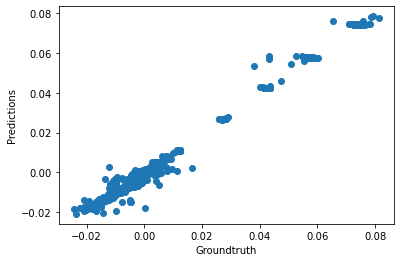

In [123]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [20]:
#%store model_fr_com_x

In [21]:
#for idx, prediction in enumerate(predictions):
#    print(f'Command: {X_test[idx, :3]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [18]:
# Save model
#joblib.dump(model_fr_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_x.sav")

## Predict CoM -> y

### Linear Regression

In [150]:
# Input
X = np.hstack((X_motion_CoM_continuous_FR_RL[:, :3], # motion command
               X_motion_CoM_continuous_FR_RL[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_continuous_FR_RL[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_com_y = LinearRegression()

# Fit the model
model_fr_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9987899310451539
RMSE:  0.0017046219273050014
The lowest error is:  1.7961837951024906e-07
The highest error is:  0.026874699727107876
The avg. error is:  0.0009880894570886293


In [151]:
model_fr_com_y.coef_

array([[ 0.05117917,  0.15720341,  0.14881086, -0.08188562,  0.16416384,
        -0.1705173 ,  0.0294997 , -0.36337627,  0.2557664 ,  0.08044179,
         0.34774576]])

In [152]:
model_fr_com_y.intercept_

array([-0.01891646])

Text(0, 0.5, 'Predictions')

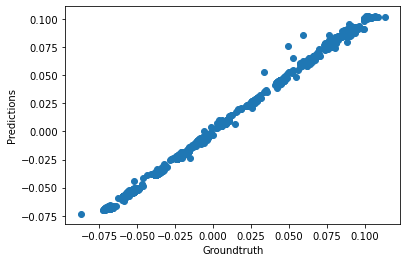

In [153]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [23]:
#%store model_fr_com_y

In [24]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [25]:
# Save model
#joblib.dump(model_fr_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_y.sav")

## Predict CoM -> yaw

### Linear Regression

In [159]:
# Input
X = np.hstack((X_motion_CoM_continuous_FR_RL[:, :3], # motion command
               X_motion_CoM_continuous_FR_RL[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_continuous_FR_RL[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_com_yaw = LinearRegression()

# Fit the model
model_fr_com_yaw.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_yaw.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  -115.80359573438169
RMSE:  0.4632051615813001
The lowest error is:  5.5173982405973786e-05
The highest error is:  6.271638275056828
The avg. error is:  0.08759566688028361


In [160]:
model_fr_com_yaw.coef_

array([[ 1.17181277e-01,  2.80529284e-03, -7.10045629e-01,
         7.91657835e+00,  5.98531617e+00, -1.44416158e+01,
         6.03112521e+00,  1.27520812e+01, -7.63716108e+00,
        -7.29553781e+00, -9.17855535e+00]])

In [161]:
model_fr_com_yaw.intercept_

array([2.67996296])

Text(0, 0.5, 'Predictions')

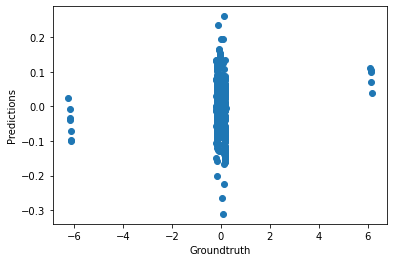

In [162]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")